# Data Science and Visualization (RUC F2023)

## Lecture 3: Data Visualization

# Advanced Visualizations

* ### Advanced bar chart
* ### Pairplot
* ### Correlation heatmap


We demonstrate with a real dataset about gas prices in selected countries from 1990 to 2000. We mainly use the library called **seaborn** which contains functions that make more advanced and/or beautiful plots.

## 0. Setup and construct the data

In [1]:
import pandas as pd
import seaborn as sns

# 'C:/Data/gas_prices.csv' is where I put my data file. You need to change it to your path/folder that contains your data file.
gas = pd.read_csv('C:/Data/gas_prices.csv')

gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [2]:
gas.shape

(19, 11)

## 1. Advanced bar chart

Here we show how to plot a bar chart in a 'transformed' manner, i.e., with horizontal bars.

### 1.1 We plot such a bar chart for all countries gas prices in the year of 1990

We get the data as the first row without the year column:

In [5]:
data = gas.iloc[0][1:]
data
#data = gas.drop(columns=['Year'])

Australia       NaN
Canada         1.87
France         3.63
Germany        2.65
Italy          4.59
Japan          3.16
Mexico         1.00
South Korea    2.05
UK             2.82
USA            1.16
Name: 0, dtype: float64

We call seaborn's **barplot()** function to plot it. In order to get the horizontal bars, we need to use 'h' for the parameter *orient*. This parameter is not defined for **bar()** in matplotlib.pyplot.

NB: If *orient* is not specified, the barplot() function will decide the orientation automatically and try to make the plot look wide. This means sometimes the bars are still horizontal. 

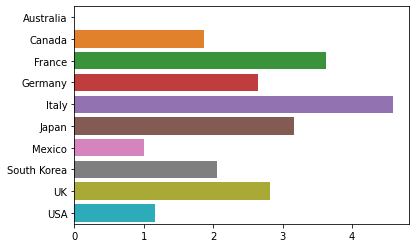

In [34]:
sns.barplot(y=data.index, x=data.values) #, orient='h')

We may want to make all bars sorted.

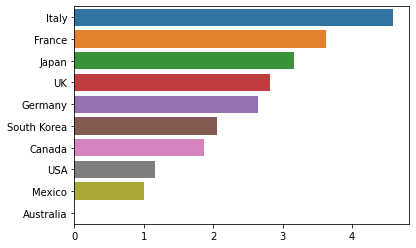

In [35]:
sorted = data.sort_values(ascending=False)

sns.barplot(y=sorted.index, x=sorted.values)

### 1.2 (Exercise) Plot a 'transformed' bar chart for USA's gas prices over all these years

In [9]:
# We get the all rows for Year and USA columns. This gives us a DataFrame object.
usa = gas.iloc[:, [0, 10]]
# usa

# We create from the DataFrame object a Series using USA prices as the values and Year as the index
series_usa = pd.Series(usa.USA.values, index=usa.Year.values)
#series_usa

# series_usa.reindex(index=series_usa.index[::-1])

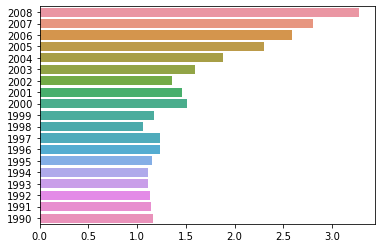

In [10]:
# We use the *order* parameter to show the years in the reverse order ([::-1])
sns.barplot(y=series_usa.index, x=series_usa.values, orient='h', order=series_usa.index[::-1])

## 2. Pairplot

### 2.1 We compare European countries with UK

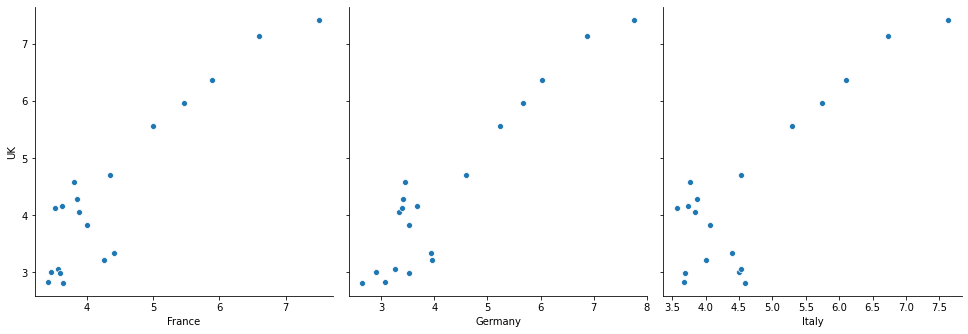

In [13]:
import matplotlib.pyplot as plt

# Compare European countries with UK
sns.pairplot(gas, x_vars=['France', 'Germany', 'Italy'], y_vars='UK', height=4.5, aspect=1)
# If the first plot does not show anything, include this "diag_kind = None"

# To save it in a file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('gas_prices_EU.png', dpi=300, bbox_inches='tight')

What kind of patterns do you see from above?

###  And Asian countries with Mexico:

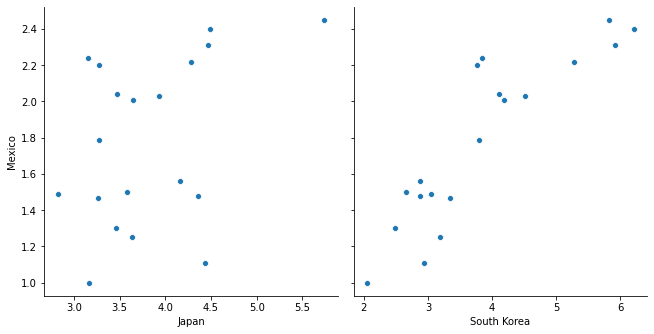

In [20]:
# Compare European countries with UK
sns.pairplot(gas, x_vars=['Japan', 'South Korea'], y_vars='Mexico', height=4.5, aspect=1)

### 2.2 (Exercise) Make a pairplot to compare Asia-Pacific countries with USA, and another one to compare European countries (incl. UK) with USA.

What can you tell from the plots?

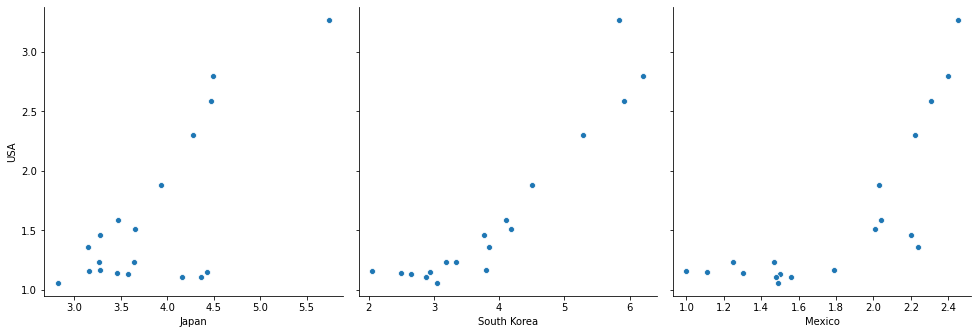

In [15]:
sns.pairplot(gas, x_vars=['Japan', 'South Korea', 'Mexico'], y_vars='USA', height=4.5, aspect=1)

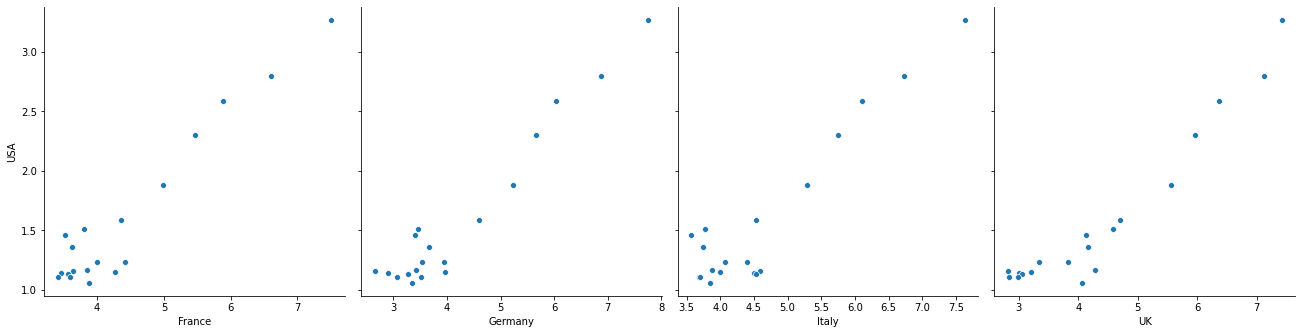

In [17]:
sns.pairplot(gas, x_vars=['France', 'Germany', 'Italy', 'UK'], y_vars='USA', height=4.5, aspect=1)

## 3. Heatmap: Another way to visualize pairwise correlation.

We may plot the correlation heatmap for each pair of countries to show the correlation.

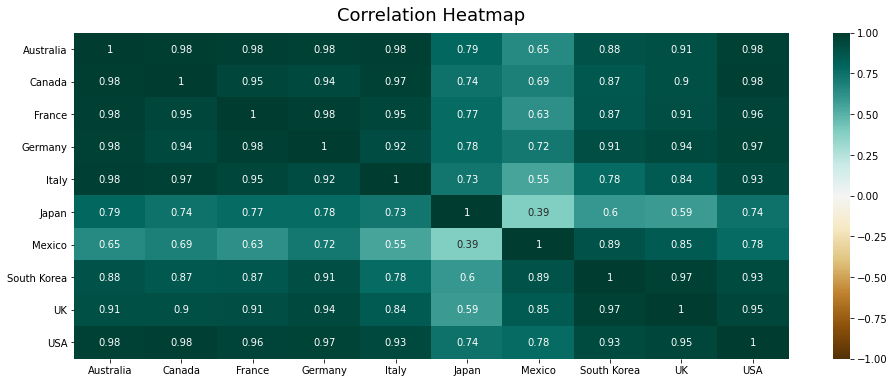

In [19]:
# Drop the column of Year, as we only want to see the correlation among countries
data = gas.drop(columns=['Year'])
#data = gas

# We may set the size of a figure
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# save heatmap as .png file
plt.savefig('heatmap_gas_prices.png', dpi=300, bbox_inches='tight')